In [167]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/craigslist-carstrucks-data/vehicles.csv


In [168]:
df = pd.read_csv('/kaggle/input/craigslist-carstrucks-data/vehicles.csv')
df

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,458208,7240959076,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,14995,2014.0,cadillac,srx,excellent,...,4wd,mid-size,SUV,silver,https://images.craigslist.org/00808_1bVcaYZtCy...,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
458209,458209,7240954682,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,17895,2018.0,hyundai,tucson,excellent,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00l0l_gikkP11dEF...,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
458210,458210,7240645700,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,17900,2014.0,cadillac,cts coupe awd,excellent,...,4wd,mid-size,coupe,black,https://images.craigslist.org/00t0t_lNnW4cboOG...,"53,000 miles. Cosmetically, in near mint condi...",wy,44.784900,-106.964800,2020-12-02T14:09:45-0700
458211,458211,7240600465,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,1300,2008.0,jeep,grand cherokee,good,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00C0C_fl0NW1IeJw...,PRICE REDUCTION Turns out the engine is toast...,wy,44.773500,-106.939600,2020-12-02T13:01:04-0700


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [170]:
df.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'image_url', 'description', 'lat', 'long', 'VIN'], axis=1, inplace=True)
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,al,2020-12-02T08:11:30-0600
1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,al,2020-12-02T02:11:50-0600
2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,al,2020-12-01T19:50:41-0600
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al,2020-12-01T15:54:45-0600
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,wausau,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,mid-size,SUV,silver,wi,2020-12-03T08:56:29-0600
458209,wausau,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,mid-size,SUV,white,wi,2020-12-03T08:48:08-0600
458210,wyoming,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,4wd,mid-size,coupe,black,wy,2020-12-02T14:09:45-0700
458211,wyoming,1300,2008.0,jeep,grand cherokee,good,8 cylinders,gas,164000.0,clean,automatic,4wd,mid-size,SUV,white,wy,2020-12-02T13:01:04-0700


In [171]:
df.isnull().sum()

region               0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
drive           134188
size            321348
type            112738
paint_color     140843
state                0
posting_date        28
dtype: int64

In [172]:
df.dropna(inplace=True)

In [173]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al,2020-12-01T15:54:45-0600
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al,2020-12-01T12:53:56-0600
14,auburn,4900,2003.0,ford,expedition,good,8 cylinders,gas,177000.0,clean,automatic,rwd,full-size,SUV,blue,al,2020-11-25T14:42:30-0600
19,auburn,47000,2020.0,jeep,gladiator,like new,6 cylinders,gas,10500.0,clean,automatic,4wd,full-size,pickup,grey,al,2020-11-23T15:02:02-0600
47,auburn,6250,2010.0,ford,fusion sel,good,6 cylinders,gas,82000.0,clean,automatic,fwd,full-size,sedan,silver,al,2020-11-14T18:51:10-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458204,wausau,4495,2006.0,buick,lacrosse cx,good,6 cylinders,gas,121488.0,clean,automatic,fwd,mid-size,sedan,black,wi,2020-12-03T09:24:54-0600
458208,wausau,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,mid-size,SUV,silver,wi,2020-12-03T08:56:29-0600
458209,wausau,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,mid-size,SUV,white,wi,2020-12-03T08:48:08-0600
458210,wyoming,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,4wd,mid-size,coupe,black,wy,2020-12-02T14:09:45-0700


In [174]:
from datetime import datetime
df['today'] = pd.Timestamp('20210411')
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date,today
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al,2020-12-01 21:54:45+00:00,2021-04-11
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al,2020-12-01 18:53:56+00:00,2021-04-11
14,auburn,4900,2003.0,ford,expedition,good,8 cylinders,gas,177000.0,clean,automatic,rwd,full-size,SUV,blue,al,2020-11-25 20:42:30+00:00,2021-04-11
19,auburn,47000,2020.0,jeep,gladiator,like new,6 cylinders,gas,10500.0,clean,automatic,4wd,full-size,pickup,grey,al,2020-11-23 21:02:02+00:00,2021-04-11
47,auburn,6250,2010.0,ford,fusion sel,good,6 cylinders,gas,82000.0,clean,automatic,fwd,full-size,sedan,silver,al,2020-11-15 00:51:10+00:00,2021-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458204,wausau,4495,2006.0,buick,lacrosse cx,good,6 cylinders,gas,121488.0,clean,automatic,fwd,mid-size,sedan,black,wi,2020-12-03 15:24:54+00:00,2021-04-11
458208,wausau,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,mid-size,SUV,silver,wi,2020-12-03 14:56:29+00:00,2021-04-11
458209,wausau,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,mid-size,SUV,white,wi,2020-12-03 14:48:08+00:00,2021-04-11
458210,wyoming,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,4wd,mid-size,coupe,black,wy,2020-12-02 21:09:45+00:00,2021-04-11


In [175]:
df['new_date'] = [d.date() for d in df['posting_date']]

In [176]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date,today,new_date
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al,2020-12-01 21:54:45+00:00,2021-04-11,2020-12-01
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al,2020-12-01 18:53:56+00:00,2021-04-11,2020-12-01
14,auburn,4900,2003.0,ford,expedition,good,8 cylinders,gas,177000.0,clean,automatic,rwd,full-size,SUV,blue,al,2020-11-25 20:42:30+00:00,2021-04-11,2020-11-25
19,auburn,47000,2020.0,jeep,gladiator,like new,6 cylinders,gas,10500.0,clean,automatic,4wd,full-size,pickup,grey,al,2020-11-23 21:02:02+00:00,2021-04-11,2020-11-23
47,auburn,6250,2010.0,ford,fusion sel,good,6 cylinders,gas,82000.0,clean,automatic,fwd,full-size,sedan,silver,al,2020-11-15 00:51:10+00:00,2021-04-11,2020-11-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458204,wausau,4495,2006.0,buick,lacrosse cx,good,6 cylinders,gas,121488.0,clean,automatic,fwd,mid-size,sedan,black,wi,2020-12-03 15:24:54+00:00,2021-04-11,2020-12-03
458208,wausau,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,mid-size,SUV,silver,wi,2020-12-03 14:56:29+00:00,2021-04-11,2020-12-03
458209,wausau,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,mid-size,SUV,white,wi,2020-12-03 14:48:08+00:00,2021-04-11,2020-12-03
458210,wyoming,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,4wd,mid-size,coupe,black,wy,2020-12-02 21:09:45+00:00,2021-04-11,2020-12-02


In [177]:
df['new_date'] = df['new_date'].apply(pd.to_datetime)
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date,today,new_date
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al,2020-12-01 21:54:45+00:00,2021-04-11,2020-12-01
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al,2020-12-01 18:53:56+00:00,2021-04-11,2020-12-01
14,auburn,4900,2003.0,ford,expedition,good,8 cylinders,gas,177000.0,clean,automatic,rwd,full-size,SUV,blue,al,2020-11-25 20:42:30+00:00,2021-04-11,2020-11-25
19,auburn,47000,2020.0,jeep,gladiator,like new,6 cylinders,gas,10500.0,clean,automatic,4wd,full-size,pickup,grey,al,2020-11-23 21:02:02+00:00,2021-04-11,2020-11-23
47,auburn,6250,2010.0,ford,fusion sel,good,6 cylinders,gas,82000.0,clean,automatic,fwd,full-size,sedan,silver,al,2020-11-15 00:51:10+00:00,2021-04-11,2020-11-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458204,wausau,4495,2006.0,buick,lacrosse cx,good,6 cylinders,gas,121488.0,clean,automatic,fwd,mid-size,sedan,black,wi,2020-12-03 15:24:54+00:00,2021-04-11,2020-12-03
458208,wausau,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,mid-size,SUV,silver,wi,2020-12-03 14:56:29+00:00,2021-04-11,2020-12-03
458209,wausau,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,mid-size,SUV,white,wi,2020-12-03 14:48:08+00:00,2021-04-11,2020-12-03
458210,wyoming,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,4wd,mid-size,coupe,black,wy,2020-12-02 21:09:45+00:00,2021-04-11,2020-12-02


In [178]:
df['days_on_market'] = (df['today'] - df['new_date'])
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date,today,new_date,days_on_market
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al,2020-12-01 21:54:45+00:00,2021-04-11,2020-12-01,131 days
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al,2020-12-01 18:53:56+00:00,2021-04-11,2020-12-01,131 days
14,auburn,4900,2003.0,ford,expedition,good,8 cylinders,gas,177000.0,clean,automatic,rwd,full-size,SUV,blue,al,2020-11-25 20:42:30+00:00,2021-04-11,2020-11-25,137 days
19,auburn,47000,2020.0,jeep,gladiator,like new,6 cylinders,gas,10500.0,clean,automatic,4wd,full-size,pickup,grey,al,2020-11-23 21:02:02+00:00,2021-04-11,2020-11-23,139 days
47,auburn,6250,2010.0,ford,fusion sel,good,6 cylinders,gas,82000.0,clean,automatic,fwd,full-size,sedan,silver,al,2020-11-15 00:51:10+00:00,2021-04-11,2020-11-15,147 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458204,wausau,4495,2006.0,buick,lacrosse cx,good,6 cylinders,gas,121488.0,clean,automatic,fwd,mid-size,sedan,black,wi,2020-12-03 15:24:54+00:00,2021-04-11,2020-12-03,129 days
458208,wausau,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,mid-size,SUV,silver,wi,2020-12-03 14:56:29+00:00,2021-04-11,2020-12-03,129 days
458209,wausau,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,mid-size,SUV,white,wi,2020-12-03 14:48:08+00:00,2021-04-11,2020-12-03,129 days
458210,wyoming,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,4wd,mid-size,coupe,black,wy,2020-12-02 21:09:45+00:00,2021-04-11,2020-12-02,130 days


In [179]:
df.drop(['posting_date', 'today', 'new_date'], axis=1, inplace=True)
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,days_on_market
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al,131 days
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al,131 days
14,auburn,4900,2003.0,ford,expedition,good,8 cylinders,gas,177000.0,clean,automatic,rwd,full-size,SUV,blue,al,137 days
19,auburn,47000,2020.0,jeep,gladiator,like new,6 cylinders,gas,10500.0,clean,automatic,4wd,full-size,pickup,grey,al,139 days
47,auburn,6250,2010.0,ford,fusion sel,good,6 cylinders,gas,82000.0,clean,automatic,fwd,full-size,sedan,silver,al,147 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458204,wausau,4495,2006.0,buick,lacrosse cx,good,6 cylinders,gas,121488.0,clean,automatic,fwd,mid-size,sedan,black,wi,129 days
458208,wausau,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,mid-size,SUV,silver,wi,129 days
458209,wausau,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,mid-size,SUV,white,wi,129 days
458210,wyoming,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,4wd,mid-size,coupe,black,wy,130 days


In [180]:
df['days_on_market'] = pd.to_numeric(df['days_on_market'].dt.days, downcast='integer')
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,days_on_market
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al,131
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al,131
14,auburn,4900,2003.0,ford,expedition,good,8 cylinders,gas,177000.0,clean,automatic,rwd,full-size,SUV,blue,al,137
19,auburn,47000,2020.0,jeep,gladiator,like new,6 cylinders,gas,10500.0,clean,automatic,4wd,full-size,pickup,grey,al,139
47,auburn,6250,2010.0,ford,fusion sel,good,6 cylinders,gas,82000.0,clean,automatic,fwd,full-size,sedan,silver,al,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458204,wausau,4495,2006.0,buick,lacrosse cx,good,6 cylinders,gas,121488.0,clean,automatic,fwd,mid-size,sedan,black,wi,129
458208,wausau,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,mid-size,SUV,silver,wi,129
458209,wausau,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,mid-size,SUV,white,wi,129
458210,wyoming,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,4wd,mid-size,coupe,black,wy,130


In [181]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['region']= labelencoder.fit_transform(df['region'])
df['manufacturer']= labelencoder.fit_transform(df['manufacturer'])
df['model']= labelencoder.fit_transform(df['model'])
df['condition']= labelencoder.fit_transform(df['condition'])
df['cylinders']= labelencoder.fit_transform(df['cylinders'])
df['fuel']= labelencoder.fit_transform(df['fuel'])
df['title_status']= labelencoder.fit_transform(df['title_status'])
df['transmission']= labelencoder.fit_transform(df['transmission'])
df['drive']= labelencoder.fit_transform(df['drive'])
df['size']= labelencoder.fit_transform(df['size'])
df['type']= labelencoder.fit_transform(df['type'])
df['paint_color']= labelencoder.fit_transform(df['paint_color'])
df['state']= labelencoder.fit_transform(df['state'])
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,days_on_market
3,16,2000,1974.0,7,2045,2,3,2,190000.0,0,0,2,1,8,1,1,131
4,16,19500,2005.0,13,4783,0,6,0,116000.0,1,0,0,1,8,1,1,131
14,16,4900,2003.0,13,4023,2,6,2,177000.0,0,0,2,1,0,1,1,137
19,16,47000,2020.0,20,5417,3,5,2,10500.0,0,0,0,1,8,5,1,139
47,16,6250,2010.0,13,5244,2,5,2,82000.0,0,0,1,1,9,9,1,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458204,382,4495,2006.0,5,6147,2,5,2,121488.0,0,0,1,2,9,0,48,129
458208,382,14995,2014.0,6,8988,0,5,2,83790.0,0,0,0,2,0,9,48,129
458209,382,17895,2018.0,17,9726,0,3,2,31888.0,0,0,0,2,0,10,48,129
458210,397,17900,2014.0,6,3131,0,5,2,53000.0,0,0,0,2,3,0,50,130


In [182]:
df = df[['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'price']]
df

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,price
3,16,1974.0,7,2045,2,3,2,190000.0,0,0,2,1,8,2000
4,16,2005.0,13,4783,0,6,0,116000.0,1,0,0,1,8,19500
14,16,2003.0,13,4023,2,6,2,177000.0,0,0,2,1,0,4900
19,16,2020.0,20,5417,3,5,2,10500.0,0,0,0,1,8,47000
47,16,2010.0,13,5244,2,5,2,82000.0,0,0,1,1,9,6250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458204,382,2006.0,5,6147,2,5,2,121488.0,0,0,1,2,9,4495
458208,382,2014.0,6,8988,0,5,2,83790.0,0,0,0,2,0,14995
458209,382,2018.0,17,9726,0,3,2,31888.0,0,0,0,2,0,17895
458210,397,2014.0,6,3131,0,5,2,53000.0,0,0,0,2,3,17900


In [183]:
import matplotlib
import matplotlib.pyplot as plt

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [184]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)

In [185]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.039702,0.510417,0.175,0.195563,0.4,0.428571,0.5,0.000093,0.0,0.0,1.0,0.333333,0.666667,5.532174e-07
1,0.039702,0.833333,0.325,0.457397,0.0,0.857143,0.0,0.000057,0.2,0.0,0.0,0.333333,0.666667,5.393870e-06
2,0.039702,0.812500,0.325,0.384718,0.4,0.857143,0.5,0.000087,0.0,0.0,1.0,0.333333,0.000000,1.355383e-06
3,0.039702,0.989583,0.500,0.518026,0.6,0.714286,0.5,0.000005,0.0,0.0,0.0,0.333333,0.666667,1.300061e-05
4,0.039702,0.885417,0.325,0.501482,0.4,0.714286,0.5,0.000040,0.0,0.0,0.5,0.333333,0.750000,1.728804e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87589,0.947891,0.843750,0.125,0.587836,0.4,0.714286,0.5,0.000059,0.0,0.0,0.5,0.666667,0.750000,1.243356e-06
87590,0.947891,0.927083,0.150,0.859520,0.0,0.714286,0.5,0.000041,0.0,0.0,0.0,0.666667,0.000000,4.147748e-06
87591,0.947891,0.968750,0.425,0.930095,0.0,0.428571,0.5,0.000016,0.0,0.0,0.0,0.666667,0.000000,4.949913e-06
87592,0.985112,0.927083,0.150,0.299417,0.0,0.714286,0.5,0.000026,0.0,0.0,0.0,0.666667,0.250000,4.951296e-06


In [186]:
X = df.iloc[:,0:13].values
y = df.iloc[:,-1].values

In [187]:
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])

In [188]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=42)

In [189]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [190]:
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [ 5.20321841e-06 -9.05548430e-05 -4.86921681e-05  5.98365652e-05
  4.74520856e-05 -6.34276380e-06 -4.67924388e-04 -2.89261412e-04
 -6.20525460e-06 -7.92246445e-06 -3.78023635e-05 -7.59877078e-06
  8.42608443e-06]
MSLE : 6.5533945258920924e-09
Root MSLE : 8.095303901579046e-05
R2 Score : -564.0654560444442 or -56406.5456%


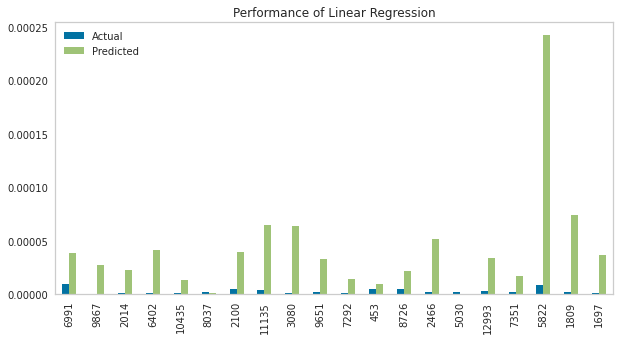

In [192]:
df_check = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()